# Wstępna ocena danych
- Rozkłady
- Boxploty
- Mapowanie dla testowania

--- ESP_results ---
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922511 entries, 0 to 922510
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Nr              922511 non-null  int64  
 1   Nazwisko        922511 non-null  object 
 2   Rg              713888 non-null  float64
 3   1.Rd            876600 non-null  object 
 4   2.Rd            876349 non-null  object 
 5   3.Rd            876030 non-null  object 
 6   4.Rd            874396 non-null  object 
 7   5.Rd            857133 non-null  object 
 8   6.Rd            795938 non-null  object 
 9   7.Rd            614327 non-null  object 
 10  8.Rd            368989 non-null  object 
 11  9.Rd            211968 non-null  object 
 12  Pkt             908600 non-null  object 
 13  M-sce           895832 non-null  float64
 14  TB 1            893812 non-null  object 
 15  TB 2            881552 non-null  object 
 16  TB 3            8440

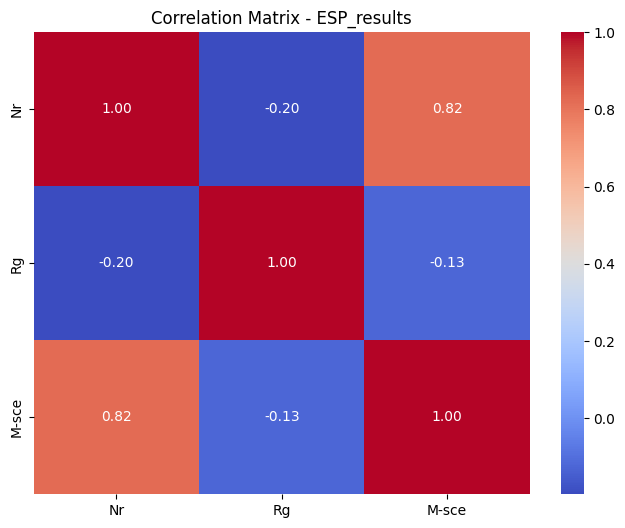

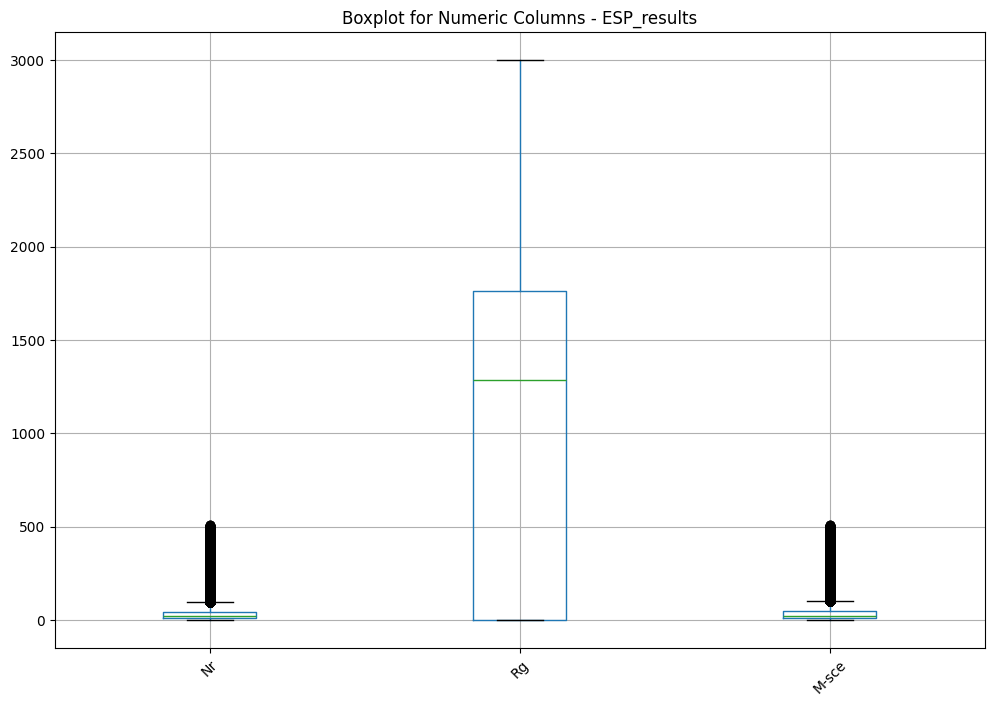

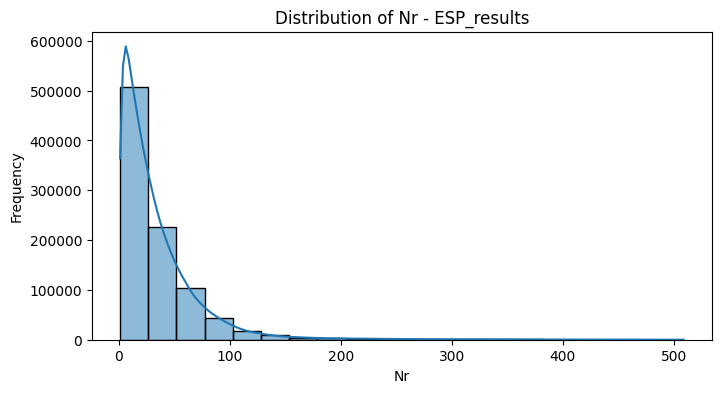

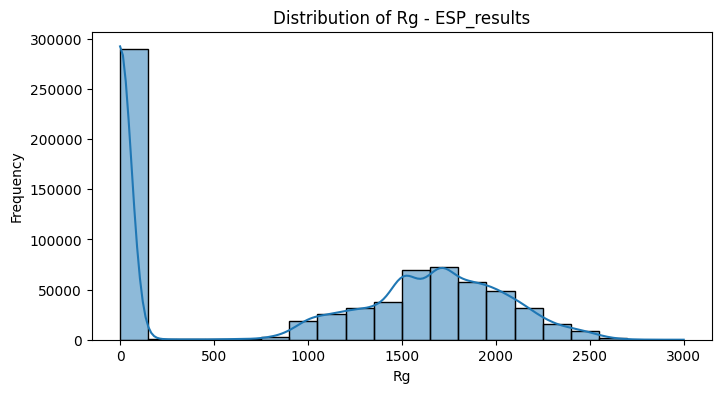

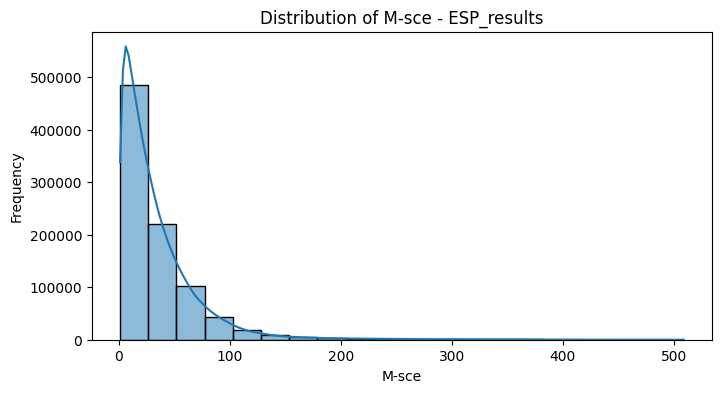

--- ESP_games ---
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2898202 entries, 0 to 2898201
Data columns (total 11 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Round             int64  
 1   WhiteStartNumber  int64  
 2   WhiteFed          object 
 3   WhiteName         object 
 4   WhiteRating       float64
 5   BlackStartNumber  int64  
 6   BlackFed          object 
 7   BlackName         object 
 8   BlackRating       float64
 9   Result            object 
 10  tournament_url    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 243.2+ MB

Head:
   Round  WhiteStartNumber WhiteFed                          WhiteName  \
0      1                14      NaN   (*) DE LOS HEROS TORRES Francisc   
1      1                12      NaN       (*) FERNANDEZ CABELLO Emilio   
2      1                 6      NaN             (*) SANCHEZ RUIZ Justo   
3      1                35      ESP  *****Moya Albaladejo Jose Antonio   
4      1 

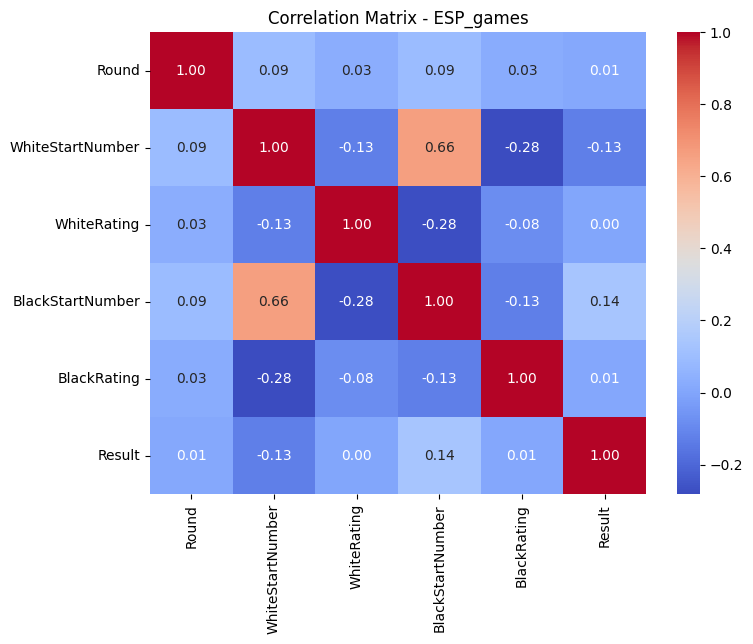

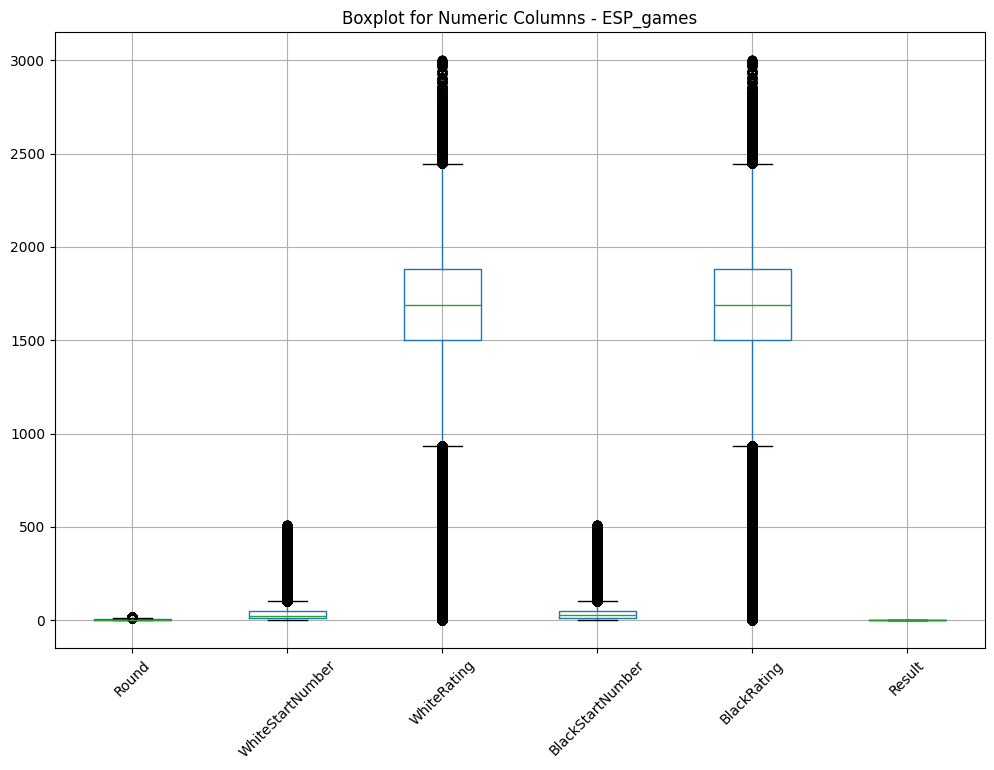

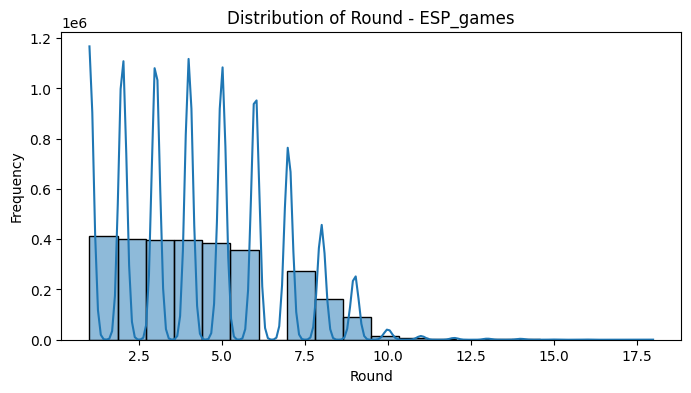

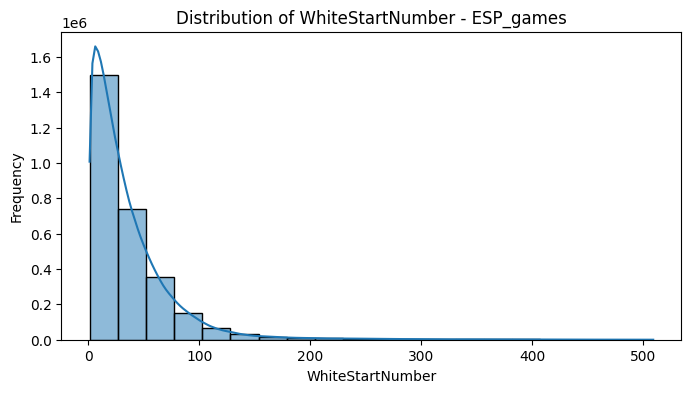

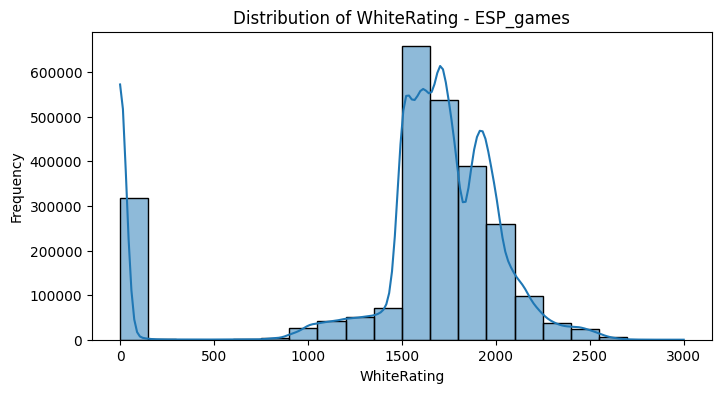

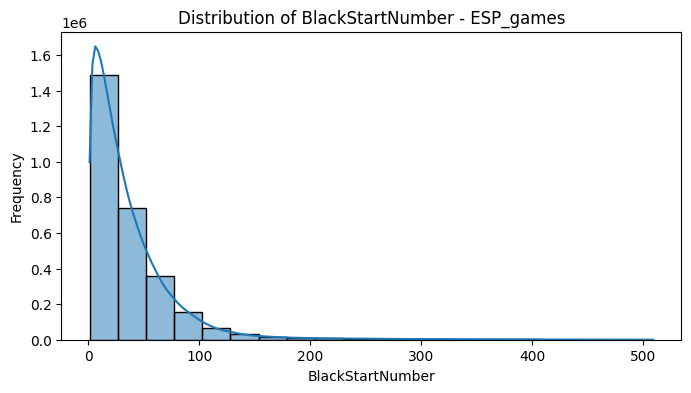

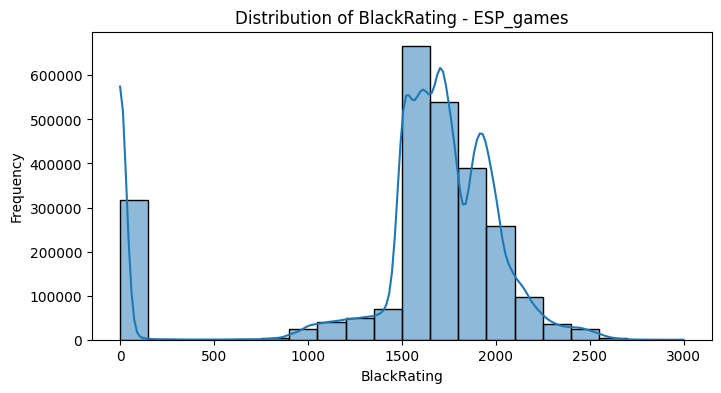

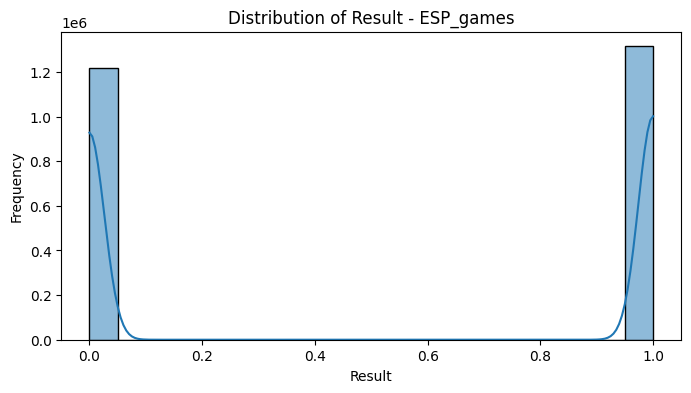

--- ESP_tournaments ---
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33623 entries, 0 to 33622
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   end_date    33623 non-null  object
 1   start_date  33623 non-null  object
 2   country     33623 non-null  object
 3   name        33623 non-null  object
 4   url         33623 non-null  object
dtypes: object(5)
memory usage: 1.3+ MB

Head:
     end_date  start_date country  \
0  2025/01/29  2025/01/29     ESP   
1  2025/01/27  2025/01/27     ESP   
2  2025/01/26  2025/01/18     ESP   
3  2025/01/26  2025/01/18     ESP   
4  2025/01/26  2025/01/26     ESP   

                                                name                    url  
0                                  Torneo San Valero  tnr1107407.aspx?lan=3  
1                          COPA BLITZ ES FORNAS 2025  tnr1103741.aspx?lan=3  
2                   Campeonato Infantil Segovia 2025  tnr1103123.asp

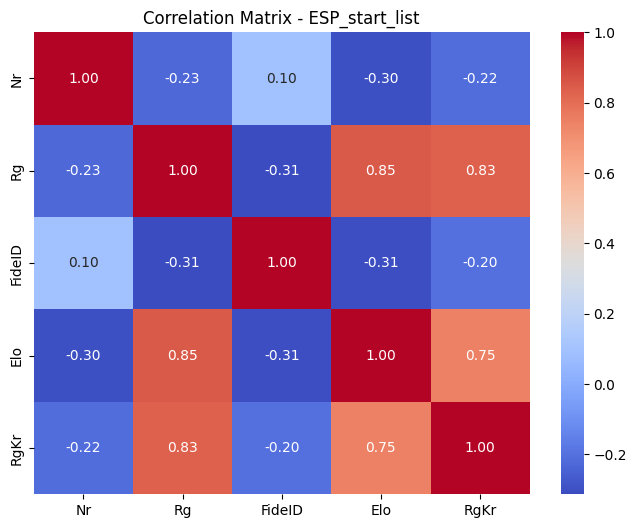

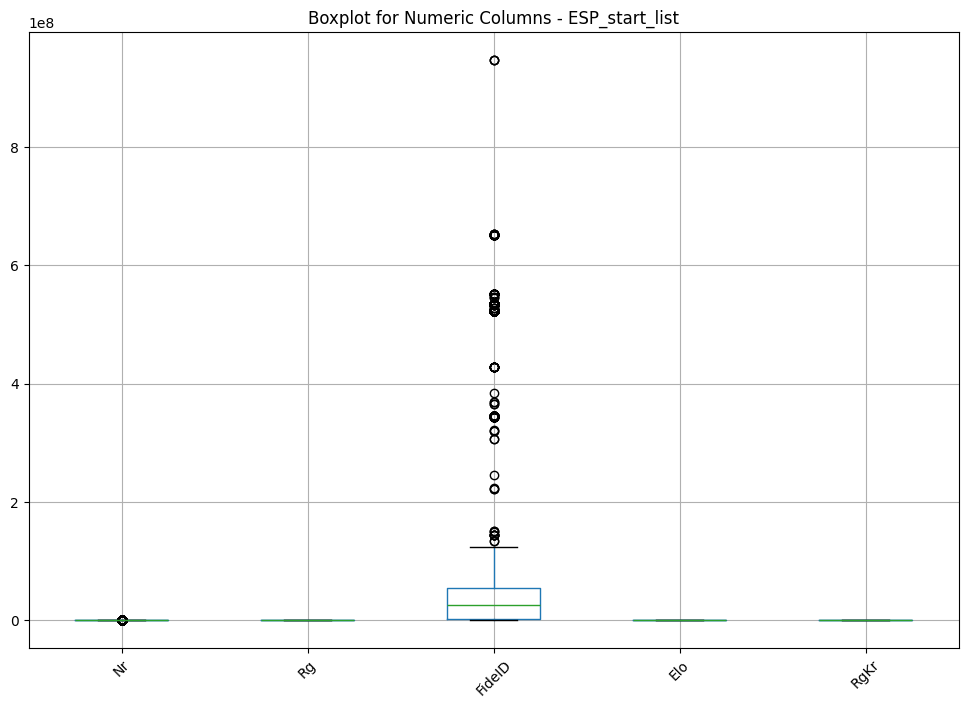

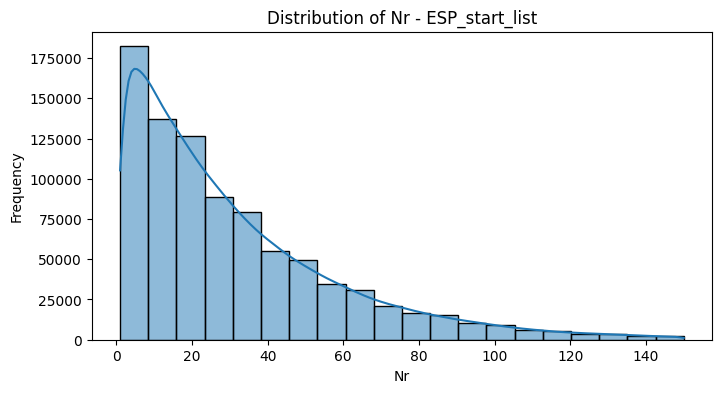

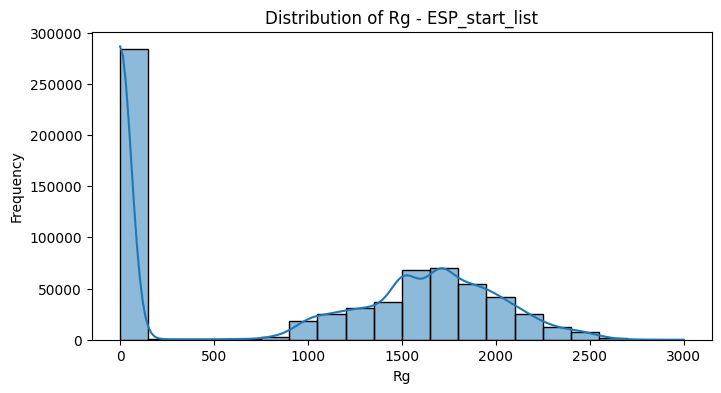

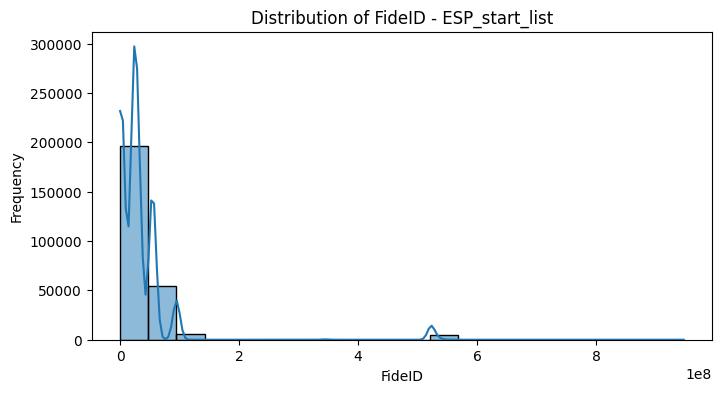

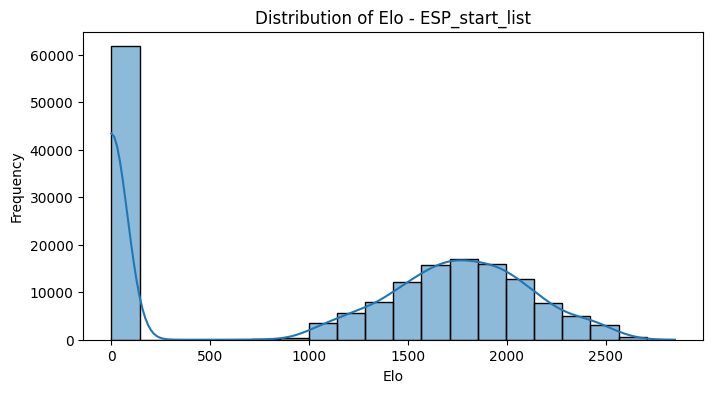

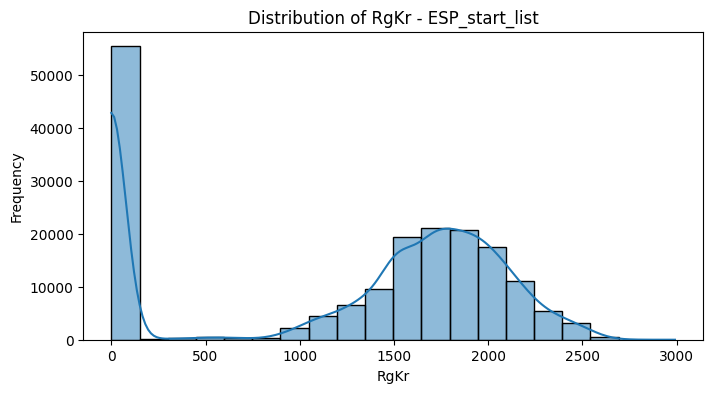

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Note: The following file paths are for reference.
# Update the paths or use your main datasets accordingly.
file_paths = {
    'ESP_results': 'data/results/ESP_results.csv',
    'ESP_games': 'data/games/ESP_games.csv', 
    'ESP_tournaments': 'data/countries/ESP_chess_tournaments_selenium.csv',
    'ESP_start_list': 'data/start_lists/ESP_start_list.csv',
}

# Function to perform basic EDA on a given DataFrame
def perform_basic_eda(df, title):
    print(f"--- {title} ---")
    print("DataFrame Info:")
    df.info()
    print("\nHead:")
    print(df.head())
    print("\nSummary statistics:")
    print(df.describe(include='all'))
    print("\n" + "="*60 + "\n")

# Function to analyze numeric columns
def eda_numeric(df, title):
    if 'Result' in df.columns:
        # change result 1-0 and 0-1 to numeric 0, 1 and draws, and rest to none
        df['Result'] = df['Result'].replace({'1-0': 1, '0-1': 0})
        df['Result'] = df['Result'].apply(lambda x: None if x not in [0, 1] else x).astype('Int64')
        
    numeric_cols = df.select_dtypes(include=['number']).columns
    if numeric_cols.empty:
        print(f"No numeric columns found in {title}")
        return

    print(f"Numeric columns in {title}: {list(numeric_cols)}")
    
    # Correlation matrix and heatmap
    corr = df[numeric_cols].corr()
    print(f"\nCorrelation matrix for {title}:\n", corr)
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix - {title}')
    plt.show()

    # Boxplot to detect outliers
    plt.figure(figsize=(12,8))
    df[numeric_cols].boxplot()
    plt.title(f'Boxplot for Numeric Columns - {title}')
    plt.xticks(rotation=45)
    plt.show()

    # Distribution plots for each numeric column
    for col in numeric_cols:
        plt.figure(figsize=(8,4))
        sns.histplot(df[col].dropna(), kde=True, bins=20)
        plt.title(f'Distribution of {col} - {title}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

# Loop through each sample file and perform EDA
datasets = {}
for name, path in file_paths.items():
    try:
        df = pd.read_csv(path, low_memory=False)

        # delete columns that have 75% or more missing values
        missing_values = df.isnull().mean()
        df = df.loc[:, missing_values < 0.9]
        datasets[name] = df
        perform_basic_eda(df, name)
        eda_numeric(df, name)
    except Exception as e:
        print(f"Error loading {name} from {path}: {e}")

# Czyszczenie danych
*UWAGA*: Ograniczam zbiór danych tylko do kraju ESP ze względu, ze dataset, który udało mi się zescrape'ować ma 5GB

In [2]:
import pandas as pd
import os
import numpy as np

print(datasets)

results_df = datasets['ESP_results']
tournaments_df = datasets['ESP_tournaments']
start_list_df = datasets['ESP_start_list']
games_df = datasets['ESP_games']

# Remove any leading/trailing whitespace from string columns
string_cols = ['Nazwisko', 'Fed', 'tournament_url', 'start_date', 'end_date']
for df in [start_list_df, results_df, games_df, tournaments_df]:
  for col in string_cols:
    if col in df.columns and df[col].dtype == object:
      df[col] = df[col].str.strip()

def clean_date(date_str):
    # Handle 'unknown' and empty values
    if pd.isna(date_str) or date_str == 'unknown':
        return np.nan
    
    # Convert to string and strip whitespace
    date_str = str(date_str).strip()
    
    # Handle '00/00' dates
    if '/00/00' in date_str:
        return np.nan
    
    # Split the date components
    try:
        year, month, day = date_str.split('/')
        
        # Pad single digits with leading zeros
        month = month.zfill(2)
        day = day.zfill(2)
        
        # Basic validation
        if not (1 <= int(month) <= 12 and 1 <= int(day) <= 31):
            return np.nan
            
        # Reconstruct the date string
        clean_date_str = f"{year}/{month}/{day}"
        return clean_date_str
    except:
        return np.nan


tournaments_df['start_date'] = tournaments_df['start_date'].apply(clean_date)
tournaments_df['end_date'] = tournaments_df['end_date'].apply(clean_date)
# Clean tournaments data
tournaments_df['start_date'] = pd.to_datetime(tournaments_df['start_date'], format='%Y/%m/%d', errors='coerce')
tournaments_df['end_date'] = pd.to_datetime(tournaments_df['end_date'], format='%Y/%m/%d', errors='coerce')

# Extract tournament ID from URL
tournaments_df['tournament_id'] = tournaments_df['url'].str.extract(r'(\d+)')
results_df['tournament_id'] = results_df['tournament_url'].str.extract(r'(\d+)')
start_list_df['tournament_id'] = start_list_df['tournament_url'].str.extract(r'(\d+)') 
games_df['tournament_id'] = games_df['tournament_url'].str.extract(r'(\d+)')

start_list_df = start_list_df.replace('', np.nan)

# Convert Elo and Rg to numeric, coercing errors to NaN
if 'Rg' in start_list_df.columns:
    start_list_df['Rg'] = pd.to_numeric(start_list_df['Rg'], errors='coerce')
if 'RgKr' in start_list_df.columns:
    start_list_df['RgKr'] = pd.to_numeric(start_list_df['RgKr'], errors='coerce')

# Clean results data
# Replace empty strings with NaN
results_df = results_df.replace('', np.nan)

# Convert numeric columns to appropriate type
numeric_cols = ['Nr', 'Rg', 'Pkt', 'M-sce', 'TB 1', 'TB 2', 'TB 3', 'TB 4', 'TB 5']
for col in numeric_cols:
  if col in results_df.columns:
    results_df[col] = pd.to_numeric(results_df[col], errors='coerce')



print('Tournaments data:')
print(tournaments_df.head())
print('Start list data:')
print(start_list_df.head())
print('Results data:')
print(results_df.head())

print(games_df.info())

{'ESP_results':         Nr                      Nazwisko      Rg  1.Rd  2.Rd  3.Rd  4.Rd  \
0        1          Lana Rodriguez David  2285.0  59b1  36w1  21b1   8w1   
1        2        Romero Pallares Daniel  2216.0  60w+  38w1  24b1  11w½   
2        3                Galstyan David  2158.0  61b1  40w1  25b1  14w1   
3        4       Asensio Asensio Nicolas  2131.0  62w1  39b1  27w1  17b1   
4        5          Atares Buisan Sergio  2078.0  63b1  41w1  28b1  20w1   
...     ..                           ...     ...   ...   ...   ...   ...   
922506  37             JANE BESORA Jordi  1700.0  16w0  26b0  24w0  32b1   
922507  38          JAREÑO BADENAS Aleix  1700.0  17b0  25w0  32b1  41w0   
922508  39    JAREÑO CASTRO Jose Antonio  1700.0  18w0  28b0  34w+  21w+   
922509  40  MALLORCA RODRIGUEZ Francisco  1700.0  19b0  31w0  33b0    -1   
922510  41       SANDEZ FERNANDEZ Eduard  1700.0  20w0  30b½  36w0  38b1   

        5.Rd  6.Rd  7.Rd  8.Rd  9.Rd  Pkt  M-sce  TB 1  TB 2      TB 3 

# Wzrost ilości partii w Hiszpanii na przestrzeni lat

/var/folders/4n/mw6f6x1x1ms_cpy1p4g0b4cw0000gn/T/ipykernel_70780/2485243610.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=games_per_year.index, y=games_per_year.values, palette='viridis', alpha=0.8)


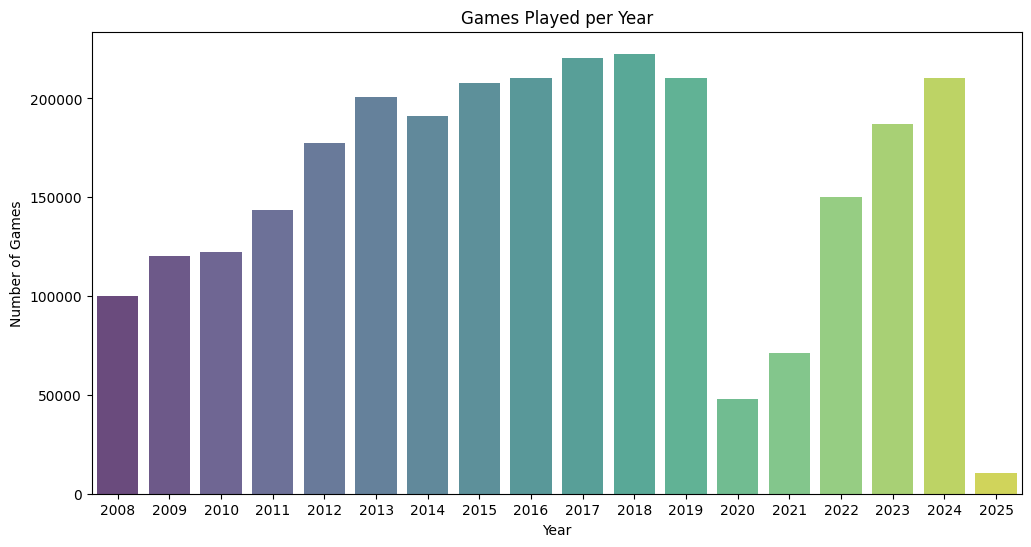

In [3]:
# Merge the dataframes games and tournaments on tournament_id
merge_df = pd.merge(games_df, tournaments_df, on='tournament_id', how='left')

# how to change 207.0 to 2007
merge_df['year'] = merge_df['start_date'].dt.year.astype('Int64')

mask_year = merge_df['year'] > 2007
merge_df = merge_df[mask_year]
games_per_year = merge_df['year'].value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.barplot(x=games_per_year.index, y=games_per_year.values, palette='viridis', alpha=0.8)
plt.title('Games Played per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.show()

# Sprawdzenie jak często gracz z gorszym rankingiem wygrywa
- Miałem trochę problemów z wynikami, tutaj testowałem problemy z rankingami i działanie z systemem elo. Zostawiam, bo przydatne w zrozumieniu wyników

In [4]:
def validate_results(games_df):
  # Add rating difference column
  games = games_df.copy()
    
  # Konwersja i czyszczenie rankingów w jednym kroku
  for col in ['WhiteRating', 'BlackRating']:
      games[col] = pd.to_numeric(games[col], errors='coerce').astype('Int64')
      games[col] = games[col].replace(0, np.nan).astype('Int64')
  
  # Usuwanie niepełnych danych
  games = games.dropna(subset=['WhiteRating', 'BlackRating', 'Result'])
  # Filtrowanie rankingów i obliczanie różnicy
  mask = (games['WhiteRating'] > 1500) & (games['BlackRating'] > 1500)
  games = games[mask]
  games['rating_diff'] = games['WhiteRating'] - games['BlackRating']
  games['favorite'] = np.where(games['rating_diff'] > 0, 'White', 'Black')
  games = games[abs(games['rating_diff']) >= 100]
  


  display(games['Result'].value_counts())


  # Add columns for analysis
  games['upset_win'] = games.apply(
      lambda x: True if (
          (x['Result'] == 0 and x['WhiteRating'] < x['BlackRating']) or
          (x['Result'] == 1 and x['BlackRating'] < x['WhiteRating'])
      ) else False, axis=1
  )

  # Print statistics
  print("\nResults Analysis:")
  print(f"Total games: {len(games)}")
  print(f"Upset wins: {games['upset_win'].sum()}")
  print(f"Upset win rate: {(games['upset_win'].sum()) / len(games)}")
  display(games['upset_win'].value_counts())

  return games

games_df = games_df.copy()
games_df = validate_results(games_df)
print(f"Length of games: {len(games_df)}")

Result
1    363325
0    333812
Name: count, dtype: Int64


Results Analysis:
Total games: 697137
Upset wins: 466084
Upset win rate: 0.66856873182746


upset_win
True     466084
False    231053
Name: count, dtype: int64

Length of games: 697137


# Usuwanie graczy bez rankingu fide
Cel: Posiadanie wysokiej jakości graczy, mozliwosc uzycia id, aby śledzić na przestrzeni wielu turniejów

In [5]:
# merged_ = pd.merge(games_df, start_list_df, on='Nr', how='left')
start_list_df['StartNumber'] = start_list_df['Nr'].astype('Int64')
#listcolumns with for start_list_df with types
print(start_list_df.info())
print(games_df.info())



games_with_white = games_df.merge(
    start_list_df,
    left_on=['WhiteStartNumber', 'tournament_id'],
    right_on=['StartNumber', 'tournament_id'],
    how='left'
    )

games_with_white['WhiteFideID'] = games_with_white['FideID'].astype('Int64')
games_with_white.drop(columns=['FideID'], inplace=True)

games_full= games_with_white.merge(
    start_list_df,
    left_on=['BlackStartNumber', 'tournament_id'],
    right_on=['StartNumber', 'tournament_id'],
    how='left'
)

games_full['BlackFideID'] = games_full['FideID'].astype('Int64')
games_full['FideID'] = games_full['FideID'].astype('Int64')

print('Players with FideID:')
print(games_full['FideID'].isnull().sum())

print('Total games with FideID:')
print(len(games_full))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924114 entries, 0 to 924113
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Nr              879847 non-null  float64
 1   Nazwisko        879847 non-null  object 
 2   Rg              683690 non-null  float64
 3   typ             103524 non-null  object 
 4   Klub/miasto     620436 non-null  object 
 5   tournament_url  924114 non-null  object 
 6   FideID_url      261484 non-null  object 
 7   FideID          261484 non-null  float64
 8   Fed             745931 non-null  object 
 9   Elo             169408 non-null  float64
 10  RgKr            178671 non-null  float64
 11  tournament_id   924114 non-null  object 
 12  StartNumber     879847 non-null  Int64  
dtypes: Int64(1), float64(5), object(7)
memory usage: 92.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 697137 entries, 6 to 2898198
Data columns (total 15 columns):
 #   Column            N

   Round  WhiteStartNumber WhiteFed                        WhiteName  \
0      1                63      ESP         ***Espadina Solano Jaime   
1      1                33      ESP       ***Garcia Andrinal Antonio   
2      1                 1      ESP  ***Monmeneu Chulia Vicente Juan   
3      1                 7      ESP       ***Pimienta Sanchez Manuel   
4      1                 4      ESP                             0009   

   WhiteRating  BlackStartNumber BlackFed                    BlackName  \
0         1744               136      ESP  Gomez Alonso, Nicolas David   
1         1774                81      NaN            Bernal Roca Urbez   
2         1998                50      NaN      Maisterra Sanchez Jesus   
3         1890                56      NaN          Garcia Mondoc Pablo   
4         2190                12      NaN       Sanjuan Segura Ignacio   

   BlackRating  Result  ... typ_y Klub/miasto_y        tournament_url  \
0         1627       1  ...   NaN  CAC Beniajan  

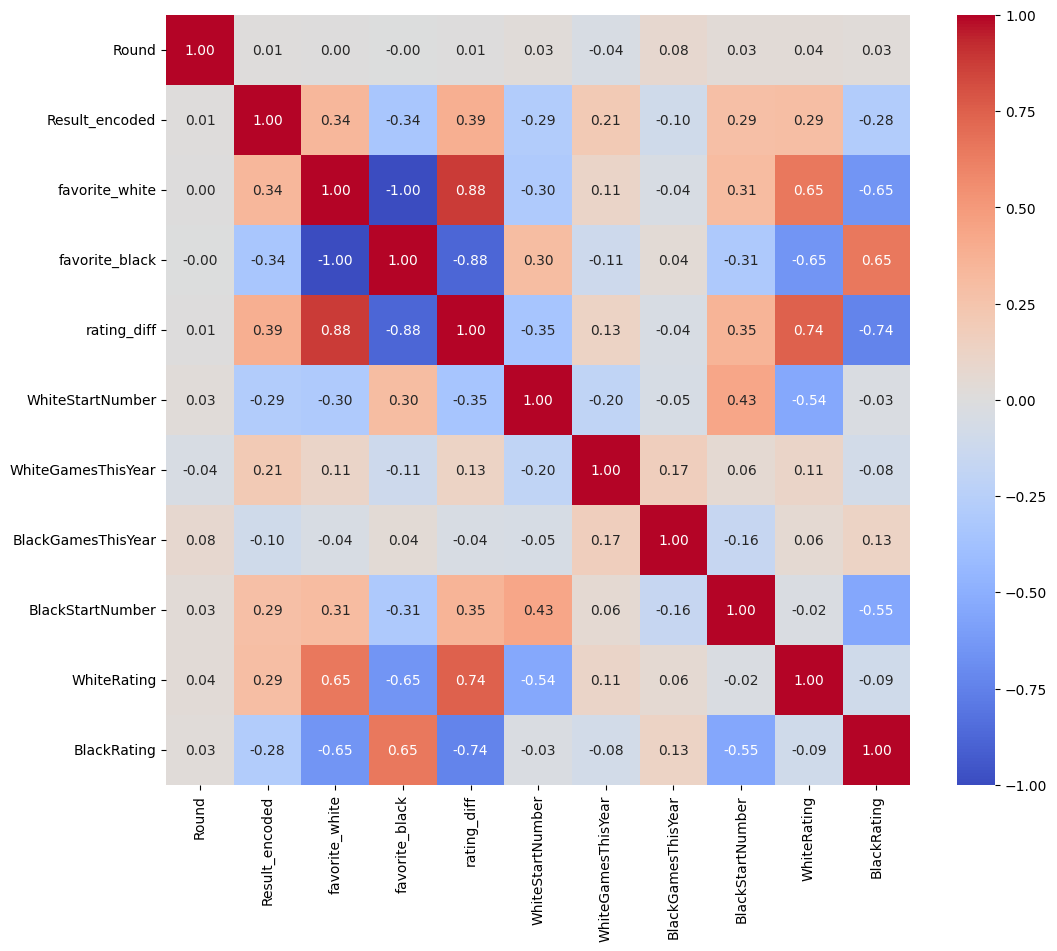

Model Performance: Random Forest
              precision    recall  f1-score   support

         0.0       0.76      0.77      0.76     66683
         1.0       0.78      0.78      0.78     72745

    accuracy                           0.77    139428
   macro avg       0.77      0.77      0.77    139428
weighted avg       0.77      0.77      0.77    139428



RandomForestClassifier(n_jobs=1, random_state=42)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
import joblib

def prepare_data(df):
    # Convert result to replace scores
    df.dropna(subset=['WhiteRating', 'BlackRating'], inplace=True)
    # one by replace the result with lambda function
    df['Result_encoded'] = df['Result'].copy()

    # count how many games player played at current tournament year
    df['year'] = df['start_date'].dt.year.astype('Int64')
    df = df.sort_values(['FideID', 'start_date'])
    df['WhiteGamesThisYear'] = df.groupby(['WhiteFideID', 'year']).cumcount().astype('Int64')
    df['BlackGamesThisYear'] = df.groupby(['BlackFideID', 'year']).cumcount().astype('Int64')

    print(df.head())
    # Drop rows with NaN values first
    df['favorite_white'] = df['WhiteRating'] > df['BlackRating']
    df['favorite_black'] = df['BlackRating'] > df['WhiteRating']

    df.dropna(subset=['WhiteRating', 'BlackRating'], inplace=True)
    df.dropna(subset=['Result_encoded'], inplace=True)
    
    
    correlatiopn_matrix = df[['Round','Result_encoded', 'favorite_white','favorite_black', "rating_diff", 'WhiteStartNumber', 'WhiteGamesThisYear', 'BlackGamesThisYear', 'BlackStartNumber', 'WhiteRating', 'BlackRating']]
    # correlation matrix
    corr = correlatiopn_matrix.corr()
    plt.figure(figsize=(12, 10))  # Adjust the figure size
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.show()

    X = df[['favorite_white', 'favorite_black', 'rating_diff', 'WhiteStartNumber', 'BlackStartNumber', 'BlackGamesThisYear', 'WhiteGamesThisYear', 'WhiteRating', 'BlackRating']]
    y = df['Result_encoded']
    
    return X, y

def train_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    param_dist = {
        'n_estimators': [100, 150, 200],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True]
    }
    clf = RandomForestClassifier(random_state=42, n_jobs=1)
    random_search = RandomizedSearchCV(
        clf, 
        param_distributions=param_dist, 
        n_iter=10, 
        cv=3, 
        scoring='accuracy', 
        verbose=3, 
        n_jobs=-1,
        return_train_score=True
    )

    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    joblib.dump(best_model, 'best_chess_model.pkl')

    print("Model Performance: Random Forest")
    print(classification_report(y_test, best_model.predict(X_test)))
    
    return best_model

# Usage
df = games_full.copy()

print(df.head())
print(tournaments_df.head())
df = df.merge(tournaments_df, on='tournament_id', how='left').copy()
X, y = prepare_data(df)
train_model(X, y)